<a href="https://colab.research.google.com/github/PosgradoMNA/proyecto_integrador_equipo22/blob/main/Avance3_22Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

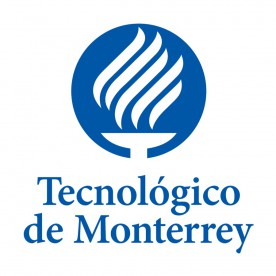


#Proyecto integrador (Equipo 22)

#### Nombre: ***José Ariel Corral Leon***
#### Matricula: ***A01793546***
----------------------------------------------------------

#### Nombre: ***Ernesto Nicanor Santillán Guerrero***
#### Matricula: ***A01793675***
----------------------------------------------------------

#### Nombre: ***Arturo Eduardo Loperena Gutiérrez***
#### Matricula: ***A01793641***




## _Sobre KIA..._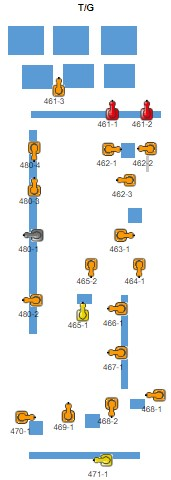

**KIA Corporation** _es un fabricante de automóviles de Corea del Sur con sede en Seúl. Fue fundada en 1944 como Kyungsung Precision Industry, y originalmente producía piezas para bicicletas y motocicletas. En 1952, cambió su nombre a Kia Industrial Company y comenzó a ensamblar vehículos bajo licencia de Honda. En 1973, Kia lanzó su primer automóvil propio, el Brisa._

En los años siguientes, **KIA** experimentó un rápido crecimiento y se convirtió en el segundo mayor fabricante de automóviles de Corea del Sur. Sin embargo, la crisis financiera asiática de 1997 golpeó duramente a la compañía y se vio obligada a declararse en bancarrota. En 1998, **KIA** fue adquirida por **Hyundai Motor Company**, que la convirtió en su filial.

Desde entonces, **KIA** se ha recuperado con éxito y se ha convertido en una de las marcas de automóviles más populares del mundo. En 2022, **KIA** vendió más de 2,7 millones de vehículos en todo el mundo.

**Departamento de Soldadura de KIA**
El departamento de soldadura es responsable de la soldadura de las carrocerías de los automóviles de la compañía. Utiliza las últimas tecnologías de soldadura para garantizar la calidad y la seguridad de los vehículos.

Para los procesos en soldadura, se utilizan diversos tipos de robots que en general clasificaremos como Robots "Gripper", "Welders" y "Sealers"



El departamento de soldadura de KIA está dividido en las siguientes secciones:

**Estructuras:** Esta sección se encarga de soldar las piezas de metal juntas para formar la carrocería del automóvil. Se utilizan diferentes tipos de soldadura, como la soldadura por puntos, la soldadura por arco y la soldadura láser.

**Moving:** Esta sección se encarga de soldar las piezas de metal juntas para formar las partes moviles como lo son las puertas, cajuelas y cofre del automóvil. Se utilizan las mismas tecnologías de soldadura como en estructuras, pero a diferencia, aqui se incorporan prensas "Hemming" con las que se realizan los rolados, contorneados y sellados de cada unos de los componentes de la parte movil.

**Body Inspection:** Esta sección se encarga de inspeccionar la calidad de las soldaduras. Se utilizan diferentes métodos de inspección, como pruebas de ultrasonidos y pruebas de rayos X.

Algunos datos interesantes sobre el departamento de soldadura de KIA:
El departamento utiliza más de 360 robots.
El departamento produce más de 3 millones de carrocerías de automóviles al año.
El departamento tiene un laboratorio de investigación y desarrollo propio.

La planta cuenta con un sistema de Monitoreo de Robots que se llama **KRDS**

 ( **KIA Robotic Diagnose System** )

En este podemos visualizar el estado de todos los robots de Soldadura:

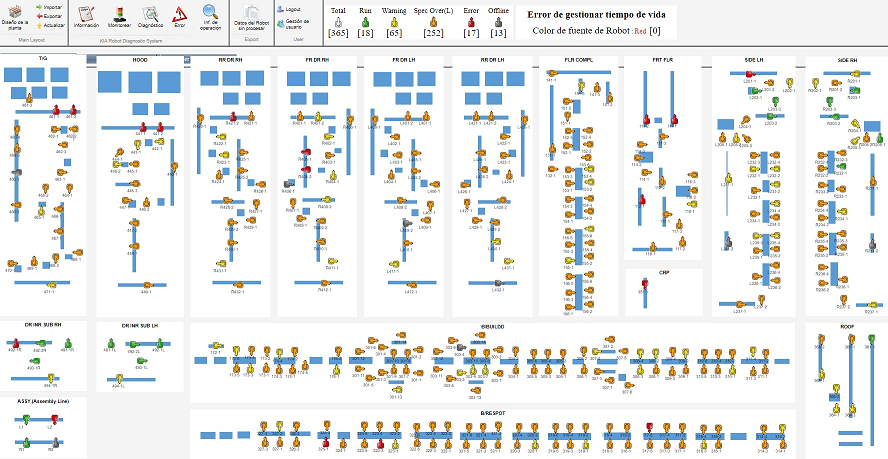

Dentro de estos, tenemos:

Robots de Sello:

| 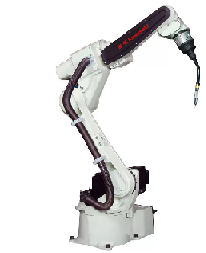

Robots de Soldadura:

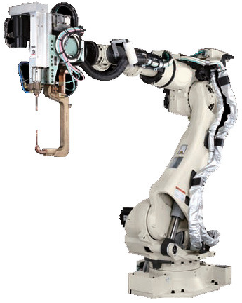

Robots Grippers:

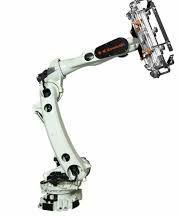

#Enfoque del proyecto:

nos enfocaremos en un robot específico:

**461-2** - _Robot Gripper / Welder_

- Detalle del robot que se extraeran para obtener posibles features:
    * Elementos mecanicos de un Robot _(Hardware)_
    * Elementos intangibles de un Robot _(Software)_
    * Elementos de monitoreo de un Robot _(Ejes, Carga,Corriente, Voltaje)_


|Elemento | Unidad | Archivo | Se usara |
|---------|---------| --------| ---------|
| 1.- Voltaje |V| PeakCurrent.xls| Si|
| 2.- Corriente |A|Readed Motor Current.xls|Si|
| 3.- Carga de trabajo |Wl|LoadFactor.xls| Si|
| 4.- Desviación de eje _(s)_ |Sigma|JointDev.xls| No|
| 5.- Precisión |mm|Precision.xls| No|
| 6.- Velocidad |RPMs|Speed-xls|No|

Las razones por las que se opto por no considerar los ultimos puntos son por que al observar el dato histórico, no se visualizó una razon o patrón que pudiera aportar alguna causa para poder diagnosticar fallas ya que aun en los momentos de las fallas en los equipos, estos 3 elementos no generan una variación considerable para su analisis.



```
# Comienzo de codificación (se incluiran algunas cotas con las descripciones)
```

## Librerias utilzadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
pd.set_option('display.min_rows', 300)
pd.set_option('display.expand_frame_repr', True)

## Módulo #1 - Introducción

Durante el curso podremos realizar algunos puntos a continuación:


| Elementos a considerar |
|---------|
| 1.- Problemas que requieren analizis de datos |
| 2.- Como se analizan las bases de datos en Python |
| 3.- Los paquetes con los que se analizan los datos de Python |
| 4.- Importanto y exportando información |
| 5.- Puntos basicos sobre el manejo de "Data Sets" |




Dentro de los puntos basicos para el análisis de datos debemos de considerar:
Tipos de datos


| Señales basicas para el analisis de información  |
|------|
| Variables excluidas  |
| Verificación de datos  |
| Distribución de datos  |
| Localizar errores en los datos  |

Procederemos a cargar las librerías para comenzar con el análisis:






### Leemos los datasets

In [3]:
PeakCurrent = pd.read_csv('./PeakCurrent.csv')
RMotor_Current = pd .read_csv('./ReadedMotorCurrent.csv')
Load_factor = pd .read_csv('./LoadFactor.csv')

## Analisis de PeakCurrent:

In [4]:
PeakCurrent.head()

,Hora/Tiempo,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
0,1/1/2024 0:15,0,0,0,0,0,0,0
1,1/1/2024 0:55,0,0,0,0,0,0,0
2,1/1/2024 1:35,0,0,0,0,0,0,0
3,1/1/2024 2:15,0,0,0,0,0,0,0
4,1/1/2024 2:55,0,0,0,0,0,0,0


In [5]:
PeakCurrent.tail()

,Hora/Tiempo,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
6487,31/12/2023 20:55,0,0,0,0,0,0,0
6488,31/12/2023 21:35,0,0,0,0,0,0,0
6489,31/12/2023 22:16,0,0,0,0,0,0,0
6490,31/12/2023 22:55,0,0,0,0,0,0,0
6491,31/12/2023 23:35,0,0,0,0,0,0,0


### Definimos como el index a la columna "Hora/Tiempo" y la convertimos a tipo datetime

In [6]:
PeakCurrent=PeakCurrent.set_index('Hora/Tiempo')
PeakCurrent.index = pd.to_datetime(PeakCurrent.index,dayfirst=True)

### Procedemos a ordenar los por fecha


In [7]:
PeakCurrent.sort_index(inplace=True)

### Revisamos datos de nuevo

In [8]:
PeakCurrent.head()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
Hora/Tiempo,,,,,,,
2023-07-04 05:36:00,"35.5 (pg41, 40)","51.8 (pg71, 27)","42.7 (pg90, 8)","10.4 (pg41, 45)","14.3 (pg71, 37)","15 (pg41, 21)","4.5 (pg31, 24)"
2023-07-04 06:22:00,"43.6 (pg41, 36)","52 (pg71, 27)","42.9 (pg90, 8)","10.4 (pg41, 45)","14.3 (pg71, 37)","15.2 (pg41, 21)","5.2 (pg71, 10)"
2023-07-04 06:56:00,"43.6 (pg41, 36)","51.7 (pg71, 27)","42.6 (pg90, 8)","10.5 (pg41, 45)","14.3 (pg71, 37)","15.1 (pg41, 21)","4.5 (pg41, 9)"
2023-07-04 07:43:00,"43.6 (pg41, 36)","51.6 (pg71, 27)","42.8 (pg90, 8)","10.6 (pg41, 45)","14.2 (pg71, 37)","15.1 (pg41, 21)","5.2 (pg71, 10)"
2023-07-04 08:17:00,"43.6 (pg41, 36)","51.9 (pg71, 27)","42.3 (pg90, 8)","10.5 (pg41, 45)","14.3 (pg71, 37)","15 (pg41, 21)","4.5 (pg41, 9)"


In [9]:
PeakCurrent.tail()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
Hora/Tiempo,,,,,,,
2024-02-02 23:36:00,"45.4 (pg90, 26)","56.8 (pg71, 27)","39 (pg90, 8)","14.8 (pg51, 18)","19.4 (pg61, 46)","15.4 (pg71, 21)","2.7 (pg90, 9)"
2024-02-03 00:16:00,"45.4 (pg90, 26)","56.9 (pg71, 27)","39.1 (pg90, 8)","14.6 (pg51, 18)","19.3 (pg61, 46)","14.6 (pg71, 21)","2.6 (pg90, 9)"
2024-02-03 00:56:00,"45.4 (pg90, 26)","56.5 (pg71, 27)","40.1 (pg90, 8)","14.6 (pg51, 18)","19.2 (pg61, 46)","14.8 (pg71, 21)","5.2 (pg71, 10)"
2024-02-03 01:35:00,"45.4 (pg90, 26)","55 (pg71, 27)","40 (pg90, 8)","14.5 (pg51, 18)","19.2 (pg61, 46)","14.4 (pg71, 21)","5.2 (pg71, 10)"
2024-02-03 02:16:00,"45.4 (pg90, 26)","56 (pg71, 27)","40.5 (pg90, 8)","14.6 (pg51, 18)","19.1 (pg61, 46)","14.3 (pg71, 21)","5.2 (pg71, 27)"


In [10]:
PeakCurrent.describe()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
count,6492,6492,6492,6492,6492,6492,6492
unique,219,357,584,265,188,321,124
top,0,0,0,0,0,0,0
freq,1773,1773,1773,1773,1773,1773,1773


In [11]:
PeakCurrent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6492 entries, 2023-07-04 05:36:00 to 2024-02-03 02:16:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Axis 1  6492 non-null   object
 1   Axis 2  6492 non-null   object
 2   Axis 3  6492 non-null   object
 3   Axis 4  6492 non-null   object
 4   Axis 5  6492 non-null   object
 5   Axis 6  6492 non-null   object
 6   Axis 7  6492 non-null   object
dtypes: object(7)
memory usage: 405.8+ KB


### Como podemos ver los datos de los ejes en Peak Current necesitan procesamiento y
### necesitamos entender con que frecuencia se recolectan los datos.

In [12]:
# Mediana de tiempo entre mediciones (en minutos)
pd.Series(PeakCurrent.index).diff().dt.total_seconds().div(60).median()

40.0

In [13]:
# promedio de tiempo entre mediciones (en minutos)
pd.Series(PeakCurrent.index).diff().dt.total_seconds().div(60).mean()

47.444153443229084

In [14]:
# Valores de tiempo entre mediciones mas comunes
pd.Series(PeakCurrent.index).diff().dt.total_seconds().div(60).value_counts().head()

40.0    4040
41.0     666
39.0     643
42.0     140
38.0     107
Name: Hora/Tiempo, dtype: int64

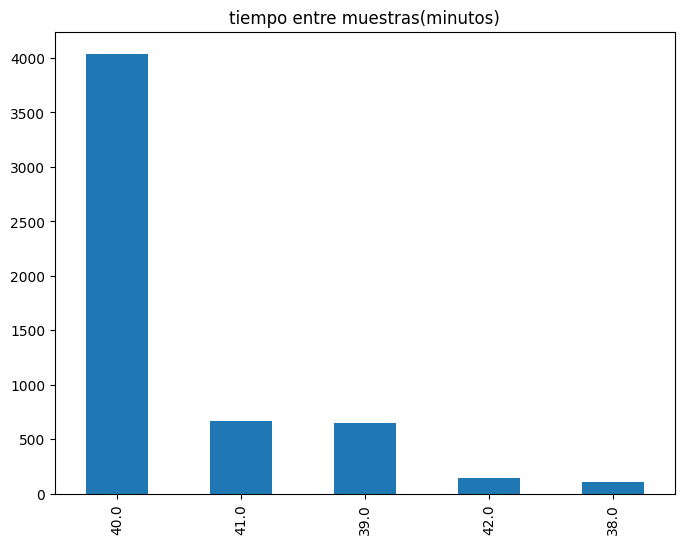

In [15]:
pd.Series(PeakCurrent.index).diff().dt.total_seconds().div(60).value_counts().nlargest(5).plot(kind='bar',figsize=(8,6)
                                                                    ,title = 'tiempo entre muestras(minutos)');

### Como se ve la mediana de la captura de datos es cada 40 minutos. Tambien podemos ver que hay periodos de tiempo entre muestra mucho mayor a los 40 minutos (Probablemente en esos instantes, el robot no esta en uso)

### Vamos a ver como son los datos de PeakCurrent para el Axis 1, cuando no son igual a '0'

In [16]:
PeakCurrent.loc[PeakCurrent['Axis 1']!='0']

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
Hora/Tiempo,,,,,,,
2023-07-04 05:36:00,"35.5 (pg41, 40)","51.8 (pg71, 27)","42.7 (pg90, 8)","10.4 (pg41, 45)","14.3 (pg71, 37)","15 (pg41, 21)","4.5 (pg31, 24)"
2023-07-04 06:22:00,"43.6 (pg41, 36)","52 (pg71, 27)","42.9 (pg90, 8)","10.4 (pg41, 45)","14.3 (pg71, 37)","15.2 (pg41, 21)","5.2 (pg71, 10)"
2023-07-04 06:56:00,"43.6 (pg41, 36)","51.7 (pg71, 27)","42.6 (pg90, 8)","10.5 (pg41, 45)","14.3 (pg71, 37)","15.1 (pg41, 21)","4.5 (pg41, 9)"
2023-07-04 07:43:00,"43.6 (pg41, 36)","51.6 (pg71, 27)","42.8 (pg90, 8)","10.6 (pg41, 45)","14.2 (pg71, 37)","15.1 (pg41, 21)","5.2 (pg71, 10)"
2023-07-04 08:17:00,"43.6 (pg41, 36)","51.9 (pg71, 27)","42.3 (pg90, 8)","10.5 (pg41, 45)","14.3 (pg71, 37)","15 (pg41, 21)","4.5 (pg41, 9)"
2023-07-04 09:03:00,"43.6 (pg41, 36)","51.8 (pg71, 27)","42.9 (pg90, 8)","10.4 (pg41, 45)","14.2 (pg71, 37)","15 (pg41, 21)","5.2 (pg71, 10)"
2023-07-04 09:37:00,"43.6 (pg41, 36)","51.8 (pg71, 27)","42.9 (pg90, 8)","10.4 (pg41, 45)","14.3 (pg71, 37)","15.2 (pg41, 21)","5.2 (pg71, 10)"
2023-07-04 10:16:00,"43.6 (pg41, 36)","51.7 (pg71, 27)","42.9 (pg90, 8)","10.7 (pg41, 45)","14.3 (pg71, 37)","15 (pg41, 21)","4.5 (pg41, 9)"
2023-07-04 11:03:00,"35.5 (pg41, 40)","51.9 (pg71, 27)","43.3 (pg90, 8)","10.7 (pg41, 45)","14.3 (pg71, 37)","14.9 (pg41, 21)","5.2 (pg71, 33)"


### Como podemos ver la corriente pico es solo un componente del string. Por el momento solo nos quedaremos con el dato de corriente
#### Iniciamos eliminando los renglones con valores igual a '0'

In [17]:
PeakCurrent=PeakCurrent.loc[(PeakCurrent!='0').any(axis=1)]

In [18]:
for column in PeakCurrent.columns:
    PeakCurrent[column]=PeakCurrent[column].apply(lambda x: float(x.split()[0]))


In [19]:
PeakCurrent.head()


,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
Hora/Tiempo,,,,,,,
2023-07-04 05:36:00,35.5,51.8,42.7,10.4,14.3,15.0,4.5
2023-07-04 06:22:00,43.6,52.0,42.9,10.4,14.3,15.2,5.2
2023-07-04 06:56:00,43.6,51.7,42.6,10.5,14.3,15.1,4.5
2023-07-04 07:43:00,43.6,51.6,42.8,10.6,14.2,15.1,5.2
2023-07-04 08:17:00,43.6,51.9,42.3,10.5,14.3,15.0,4.5


In [20]:
PeakCurrent.tail()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
Hora/Tiempo,,,,,,,
2024-02-02 23:36:00,45.4,56.8,39.0,14.8,19.4,15.4,2.7
2024-02-03 00:16:00,45.4,56.9,39.1,14.6,19.3,14.6,2.6
2024-02-03 00:56:00,45.4,56.5,40.1,14.6,19.2,14.8,5.2
2024-02-03 01:35:00,45.4,55.0,40.0,14.5,19.2,14.4,5.2
2024-02-03 02:16:00,45.4,56.0,40.5,14.6,19.1,14.3,5.2


In [21]:
PeakCurrent.describe()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
count,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000,4719.000000
mean,38.022017,47.341598,43.282433,11.500572,13.288705,13.519284,4.392668
std,14.387888,16.565280,13.893965,4.553213,4.987239,4.874443,3.308387
min,0.100000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,51.000000,39.700000,10.300000,14.200000,14.700000,2.600000
50%,45.400000,52.100000,42.800000,14.500000,14.400000,14.900000,5.200000
75%,45.400000,56.100000,54.800000,14.800000,14.500000,15.300000,5.200000
max,48.000000,58.000000,59.800000,25.100000,26.900000,20.500000,28.500000


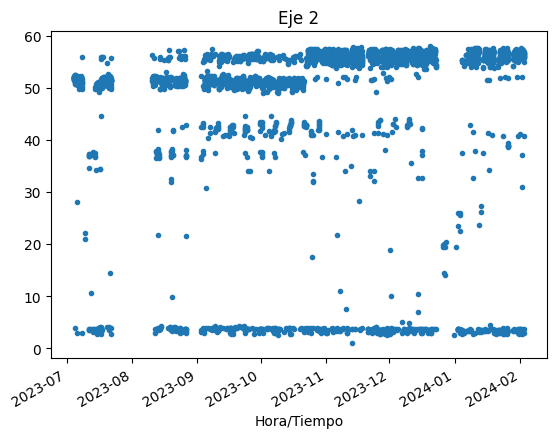

In [22]:
PeakCurrent['Axis 2'].plot(style='.',title='Eje 2');


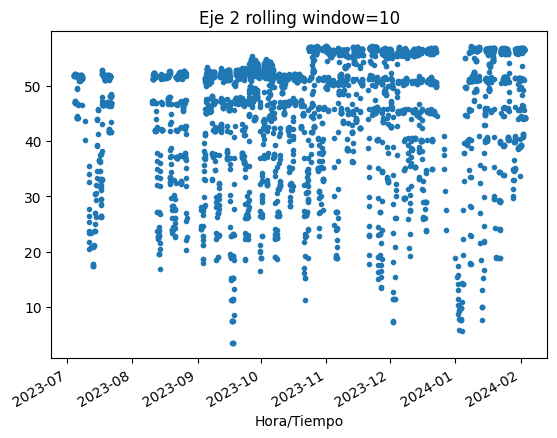

In [23]:
PeakCurrent['Axis 2'].rolling(window=10).mean().plot(style='.',title='Eje 2 rolling window=10');

## Analisis de Readed Motor Current

In [24]:
RMotor_Current.head()

,Hora/Tiempo,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
0,10/8/2023 14:09,-1.21,-12.49,12.70,3.30,0.84,2.37,1.32,1.23
1,10/8/2023 14:57,18.45,-7.12,26.20,5.92,-5.54,5.76,-0.06,-5.58
2,10/8/2023 15:43,-0.84,-1.95,12.12,3.42,-5.51,1.29,-0.16,-0.57
3,10/8/2023 16:27,-5.85,28.78,17.19,4.18,-1.10,2.81,0.06,45.77
4,10/8/2023 16:55,7.33,-10.33,28.99,2.89,-3.53,7.46,-0.16,-0.49


In [25]:
RMotor_Current.tail()

,Hora/Tiempo,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
5707,2/2/2024 23:35,-2.64,9.12,16.61,-3.04,-1.48,2.86,0.06,-0.16
5708,3/2/2024 0:16,10.65,9.28,14.23,5.77,1.18,1.29,-0.03,-1.07
5709,3/2/2024 0:55,-5.69,18.13,16.55,5.51,-0.46,7.15,0.03,50.04
5710,3/2/2024 1:35,13.18,-34.05,17.50,-5.77,-6.11,6.66,0.19,-0.98
5711,3/2/2024 2:15,17.55,-12.44,21.77,0.27,-6.83,-12.29,-2.73,-4.02


### Definimos como el index a la columna "Hora/Tiempo" y la convertimos a tipo datetime

In [26]:
RMotor_Current=RMotor_Current.set_index('Hora/Tiempo')
RMotor_Current.index = pd.to_datetime(RMotor_Current.index,dayfirst=True)

In [27]:
RMotor_Current.sort_index(inplace=True)

### Revisamos datos de nuevo

In [28]:
RMotor_Current.head()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
Hora/Tiempo,,,,,,,,
2023-08-10 14:09:00,-1.21,-12.49,12.70,3.30,0.84,2.37,1.32,1.23
2023-08-10 14:57:00,18.45,-7.12,26.20,5.92,-5.54,5.76,-0.06,-5.58
2023-08-10 15:43:00,-0.84,-1.95,12.12,3.42,-5.51,1.29,-0.16,-0.57
2023-08-10 16:27:00,-5.85,28.78,17.19,4.18,-1.10,2.81,0.06,45.77
2023-08-10 16:55:00,7.33,-10.33,28.99,2.89,-3.53,7.46,-0.16,-0.49


In [29]:
RMotor_Current.describe()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
count,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000
mean,-0.023659,3.775004,10.634848,1.113899,-1.923426,0.369480,0.057763,0.073932
std,4.716715,12.466165,9.184159,2.641243,3.050421,3.106714,0.539385,5.886978
min,-27.250000,-39.540000,-9.800000,-12.680000,-13.330000,-14.610000,-4.210000,-50.530000
25%,-0.370000,-1.900000,0.000000,0.000000,-5.160000,-0.317500,0.000000,-0.250000
50%,0.000000,0.000000,12.340000,0.000000,-0.650000,0.000000,0.000000,0.000000
75%,0.370000,15.390000,16.660000,3.340000,0.000000,1.290000,0.160000,0.000000
max,40.750000,37.900000,39.800000,13.630000,14.240000,16.830000,4.020000,55.290000


In [30]:
RMotor_Current.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5712 entries, 2023-08-10 14:09:00 to 2024-02-03 02:15:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Axis 1  5712 non-null   float64
 1   Axis 2  5712 non-null   float64
 2   Axis 3  5712 non-null   float64
 3   Axis 4  5712 non-null   float64
 4   Axis 5  5712 non-null   float64
 5   Axis 6  5712 non-null   float64
 6   Axis 7  5712 non-null   float64
 7   Axis 8  5712 non-null   float64
dtypes: float64(8)
memory usage: 401.6 KB


### Observamos los renglones con valores de corriente igual a 0. Por el momento los dejamos

In [31]:
RMotor_Current.loc[(RMotor_Current==0.00).all(axis=1)]

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
Hora/Tiempo,,,,,,,,
2023-08-10 18:21:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-10 19:35:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-10 20:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-10 20:58:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-10 21:41:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-11 21:35:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-11 22:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-11 22:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-12 01:36:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
RMotor_Current.head(200)

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
Hora/Tiempo,,,,,,,,
2023-08-10 14:09:00,-1.21,-12.49,12.70,3.30,0.84,2.37,1.32,1.23
2023-08-10 14:57:00,18.45,-7.12,26.20,5.92,-5.54,5.76,-0.06,-5.58
2023-08-10 15:43:00,-0.84,-1.95,12.12,3.42,-5.51,1.29,-0.16,-0.57
2023-08-10 16:27:00,-5.85,28.78,17.19,4.18,-1.10,2.81,0.06,45.77
2023-08-10 16:55:00,7.33,-10.33,28.99,2.89,-3.53,7.46,-0.16,-0.49
2023-08-10 17:39:00,2.69,4.11,26.83,3.76,-0.99,3.48,0.00,0.98
2023-08-10 18:21:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-08-10 19:02:00,-2.11,-15.18,20.88,4.63,-8.05,0.54,0.22,-1.97
2023-08-10 19:35:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


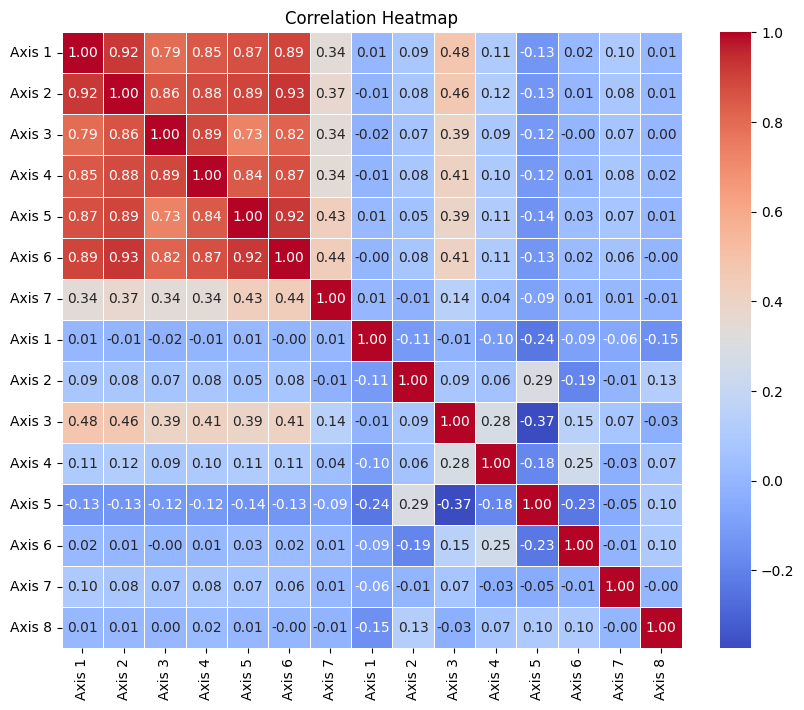

In [33]:
all_data = pd.concat([PeakCurrent, RMotor_Current], axis=1)

# Calculate the correlation matrix
correlation_matrix = all_data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Pendiente analizar porque RMotor_Current tiene un eje adicional

## Analisis de Load Factor

In [34]:
Load_factor.head()

,Hora/Tiempo,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
0,1/1/2024 0:15,0,0,0,0,0,0,0,0
1,1/1/2024 0:55,0,0,0,0,0,0,0,0
2,1/1/2024 1:35,0,0,0,0,0,0,0,0
3,1/1/2024 2:15,0,0,0,0,0,0,0,0
4,1/1/2024 2:55,0,0,0,0,0,0,0,0


In [35]:
Load_factor.tail()

,Hora/Tiempo,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
6451,31/12/2023 20:55,0,0,0,0,0,0,0,0
6452,31/12/2023 21:35,0,0,0,0,0,0,0,0
6453,31/12/2023 22:15,0,0,0,0,0,0,0,0
6454,31/12/2023 22:55,0,0,0,0,0,0,0,0
6455,31/12/2023 23:35,0,0,0,0,0,0,0,0


In [36]:
Load_factor.describe()

,Hora/Tiempo,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
count,6456,6456,6456,6456,6456,6456,6456,6456,6456
unique,6456,512,1005,508,709,745,957,340,905
top,1/1/2024 0:15,"100 (pg90, 22)",0,0,0,0,0,"100 (pg72, 23)",0
freq,1,2097,1657,1657,1657,1657,1657,2163,1657


In [37]:
Load_factor=Load_factor.set_index('Hora/Tiempo')
Load_factor.index = pd.to_datetime(Load_factor.index,dayfirst=True)

In [38]:
Load_factor.sort_index(inplace=True)

### Revisamos datos de nuevo

In [39]:
Load_factor.head()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
Hora/Tiempo,,,,,,,,
2023-07-04 05:36:00,"100 (pg90, 22)","82.5 (buffer_sc4, 8)","100 (pg31, 37)","64.4 (pg90, 6)","61.8 (buffer_bd4, 17)","79.1 (buffer_sc4, 18)","100 (bd4_b_nonkey, 12)","100 (pg45, 6)"
2023-07-04 06:22:00,"100 (pg90, 22)","82 (buffer_sc4, 8)","100 (pg31, 37)","59.2 (bd4_b_nonkey, 8)","61.4 (buffer_bd4, 17)","80.4 (buffer_sc4, 18)","100 (pg72, 23)","100 (pg45, 6)"
2023-07-04 06:56:00,"100 (pg90, 22)","81.8 (buffer_sc4, 8)","100 (pg31, 37)","64.9 (pg41, 33)","68.5 (pg41, 24)","79.2 (buffer_sc4, 18)","100 (pg72, 23)","100 (pg45, 6)"
2023-07-04 07:43:00,"100 (pg90, 22)","82.5 (buffer_sc4, 8)","100 (pg31, 37)","65.1 (pg41, 33)","68.5 (pg41, 24)","79.2 (buffer_sc4, 18)","100 (pg72, 23)","88.8 (bd4_b_nonkey, 24)"
2023-07-04 08:17:00,"95.8 (pg72, 42)","83.3 (buffer_sc4, 8)","100 (pg31, 37)","65.5 (pg41, 33)","68.9 (pg41, 24)","79.8 (buffer_sc4, 18)","100 (pg41, 10)","89.1 (bd4_b_nonkey, 24)"


In [40]:
Load_factor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6456 entries, 2023-07-04 05:36:00 to 2024-02-03 02:16:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Axis 1  6456 non-null   object
 1   Axis 2  6456 non-null   object
 2   Axis 3  6456 non-null   object
 3   Axis 4  6456 non-null   object
 4   Axis 5  6456 non-null   object
 5   Axis 6  6456 non-null   object
 6   Axis 7  6456 non-null   object
 7   Axis 8  6456 non-null   object
dtypes: object(8)
memory usage: 453.9+ KB


### Vamos a ver como son los datos de Load_factor para el Axis 1, cuando no son igual a '0'

In [41]:
Load_factor.loc[Load_factor['Axis 1']!='0']

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
Hora/Tiempo,,,,,,,,
2023-07-04 05:36:00,"100 (pg90, 22)","82.5 (buffer_sc4, 8)","100 (pg31, 37)","64.4 (pg90, 6)","61.8 (buffer_bd4, 17)","79.1 (buffer_sc4, 18)","100 (bd4_b_nonkey, 12)","100 (pg45, 6)"
2023-07-04 06:22:00,"100 (pg90, 22)","82 (buffer_sc4, 8)","100 (pg31, 37)","59.2 (bd4_b_nonkey, 8)","61.4 (buffer_bd4, 17)","80.4 (buffer_sc4, 18)","100 (pg72, 23)","100 (pg45, 6)"
2023-07-04 06:56:00,"100 (pg90, 22)","81.8 (buffer_sc4, 8)","100 (pg31, 37)","64.9 (pg41, 33)","68.5 (pg41, 24)","79.2 (buffer_sc4, 18)","100 (pg72, 23)","100 (pg45, 6)"
2023-07-04 07:43:00,"100 (pg90, 22)","82.5 (buffer_sc4, 8)","100 (pg31, 37)","65.1 (pg41, 33)","68.5 (pg41, 24)","79.2 (buffer_sc4, 18)","100 (pg72, 23)","88.8 (bd4_b_nonkey, 24)"
2023-07-04 08:17:00,"95.8 (pg72, 42)","83.3 (buffer_sc4, 8)","100 (pg31, 37)","65.5 (pg41, 33)","68.9 (pg41, 24)","79.8 (buffer_sc4, 18)","100 (pg41, 10)","89.1 (bd4_b_nonkey, 24)"
2023-07-04 09:03:00,"100 (pg90, 22)","82.7 (buffer_sc4, 8)","100 (pg31, 37)","65.3 (pg41, 33)","68.9 (pg41, 24)","79.4 (buffer_sc4, 18)","100 (bd4_b_nonkey, 12)","88.8 (bd4_b_nonkey, 24)"
2023-07-04 09:37:00,"100 (pg90, 22)","82.5 (buffer_sc4, 8)","100 (pg72, 41)","65.2 (pg41, 33)","69.1 (pg41, 24)","79 (buffer_sc4, 18)","100 (pg41, 10)","91.3 (pg35, 23)"
2023-07-04 10:16:00,"100 (pg90, 22)","82.6 (buffer_sc4, 8)","100 (pg31, 37)","65.3 (pg41, 33)","70.4 (pg35, 8)","80.1 (buffer_sc4, 18)","100 (bd4_b_nonkey, 12)","100 (pg35, 23)"
2023-07-04 11:03:00,"100 (pg90, 22)","82.2 (buffer_sc4, 8)","100 (pg31, 37)","65.6 (pg41, 33)","69 (pg41, 24)","79.8 (buffer_sc4, 18)","100 (pg41, 10)","92.9 (pg35, 23)"


### Como podemos ver el Load_factor es solo un componente del string. Por el momento solo nos quedaremos con el dato Load_factor.
#### Iniciamos eliminando los renglones con valores igual a '0'

In [42]:
Load_factor=Load_factor.loc[(Load_factor!='0').any(axis=1)]

In [43]:
for column in Load_factor.columns:
  Load_factor[column]=Load_factor[column].apply(lambda x: float(x.split()[0]))

In [44]:
Load_factor.head()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
Hora/Tiempo,,,,,,,,
2023-07-04 05:36:00,100.0,82.5,100.0,64.4,61.8,79.1,100.0,100.0
2023-07-04 06:22:00,100.0,82.0,100.0,59.2,61.4,80.4,100.0,100.0
2023-07-04 06:56:00,100.0,81.8,100.0,64.9,68.5,79.2,100.0,100.0
2023-07-04 07:43:00,100.0,82.5,100.0,65.1,68.5,79.2,100.0,88.8
2023-07-04 08:17:00,95.8,83.3,100.0,65.5,68.9,79.8,100.0,89.1


In [45]:
Load_factor.describe()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
count,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000
mean,85.750615,69.005751,91.282142,56.929069,66.643342,65.726589,83.147010,84.306522
std,32.146085,22.728381,22.426450,16.943994,16.286956,22.671003,36.913459,32.354284
min,0.100000,0.200000,21.600000,3.100000,3.900000,3.100000,0.100000,0.100000
25%,95.600000,67.800000,100.000000,59.100000,61.900000,65.600000,100.000000,89.600000
50%,100.000000,78.300000,100.000000,63.600000,71.000000,73.700000,100.000000,100.000000
75%,100.000000,81.400000,100.000000,65.200000,76.400000,78.900000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


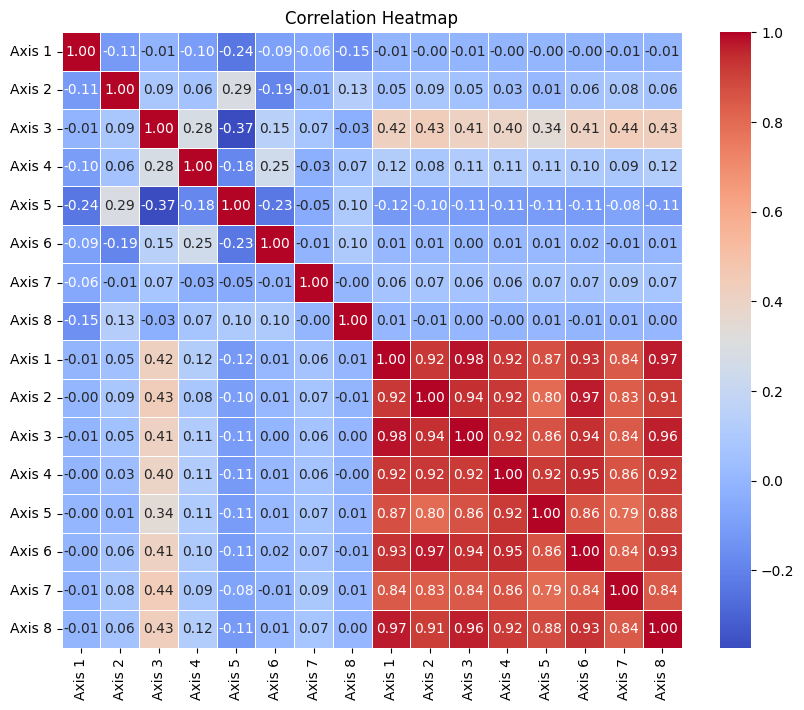

In [46]:
all_data = pd.concat([RMotor_Current, Load_factor], axis=1)

# Calculate the correlation matrix
correlation_matrix = all_data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

 Para poder realizar el manejo de datos de forma correcta tomaremos en cuenta los siguientes aspectos:


 | Características de la informacion y su manejo |
 ---
 Pre - Procesamiento
 Resolución de datos faltantes
 Formateo de valores
 Normalización de datos
 Binnado con python
 Migrando categorías de variables a cuantitativas

##  Manejo de datos

Hay diferentes formas de la interpretación de los datos segun el typo de datos y quien lo interprete:


| Tipo de datos de PANDAS  |  Tipo de dato  |  Descripción  |
| --- | --- | --- |
| Objeto  | String  | Numeros y "strings"  |
| int64  | int | Caracteres numéricos  |
| float64  | float  | Caracteres numéricos con puntos decimales |
| datetime64, timedelta NS  | N/A (pero se puede determinar por modulo de
tiempo segun las librerías)  | información de tiempo y fecha  |

✅ habiendo validado los datos, se observaron varios valores en "0"s, estos se revisaron directamente en el sistema para validar si era un error en el comportamiento del Robot o bien si es un problema de operación del Robot.

⭐ Se identifico que cuando los robots eventualmente no estan operando, hay ocasiones en los que el scanner de colección de datos _(que hace un barrido de recolección de los datos de cada robot)_ llega a suceder que el robot no esta moviendoze ya sea por que el robo esta detenido o bien por que el robot esta en remplazo de Caps o de alguno de sus componentes, su dato es "0".

Esto hace que el dato tenga razon de ser ya que el robot al no ser utilizado, no registra datos en falso.

**Tras esta conclusión, se puede determinar que todos los datos que se estan evaluando son en tiempo real mientras el robot se encuentra en movimiento y los que esten en "0" seran discriminados para no desviar los valores.**

**df.dtypes**  = muestra el tipo de datos que tenemos en cada segmento

**df.describe** = muestra una tabla de detalles con estimaciones matematicas para poder identificar anormalidades

**df.describe(include="all")** = incluye todas las características del Dataframe
**df.info() =  muestra toda la tabla resumida

Procederemos a realizar el análisis en el Robot **461-2**

Un Robot Gripper / Welder

Ubicado en la linea de "Tail Gate" - Puerta Trasera


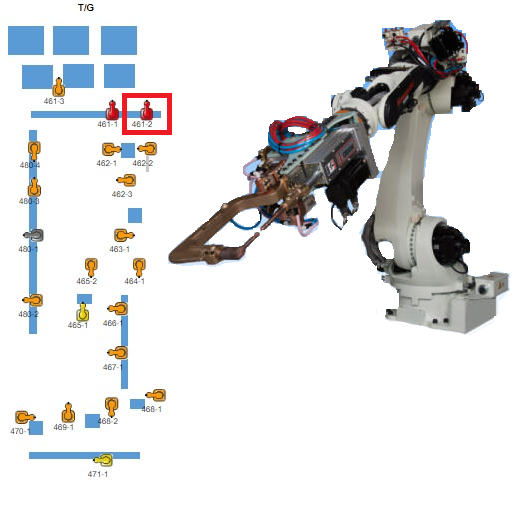

### Generación de nuevas características

### Definimos funcion para generar nuevas variables. En este caso van a estar relacionadas con la fecha y hora del muestreo de los datos

In [47]:
def generar_features(df):
  """
  Generar caracteristicas de tiempo
  """
  df=df.copy()
  df['hora']=df.index.hour
  df['diadelasemana']=df.index.dayofweek
  df['cuarto']=df.index.quarter
  df['mes']=df.index.month
  df['año']=df.index.year
  return df



### Usamos funcion en Dataframe PeakCurrent

In [48]:
PeakCurrent=generar_features(PeakCurrent)

In [49]:
PeakCurrent.head()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,hora,diadelasemana,cuarto,mes,año
Hora/Tiempo,,,,,,,,,,,,
2023-07-04 05:36:00,35.5,51.8,42.7,10.4,14.3,15.0,4.5,5,1,3,7,2023
2023-07-04 06:22:00,43.6,52.0,42.9,10.4,14.3,15.2,5.2,6,1,3,7,2023
2023-07-04 06:56:00,43.6,51.7,42.6,10.5,14.3,15.1,4.5,6,1,3,7,2023
2023-07-04 07:43:00,43.6,51.6,42.8,10.6,14.2,15.1,5.2,7,1,3,7,2023
2023-07-04 08:17:00,43.6,51.9,42.3,10.5,14.3,15.0,4.5,8,1,3,7,2023


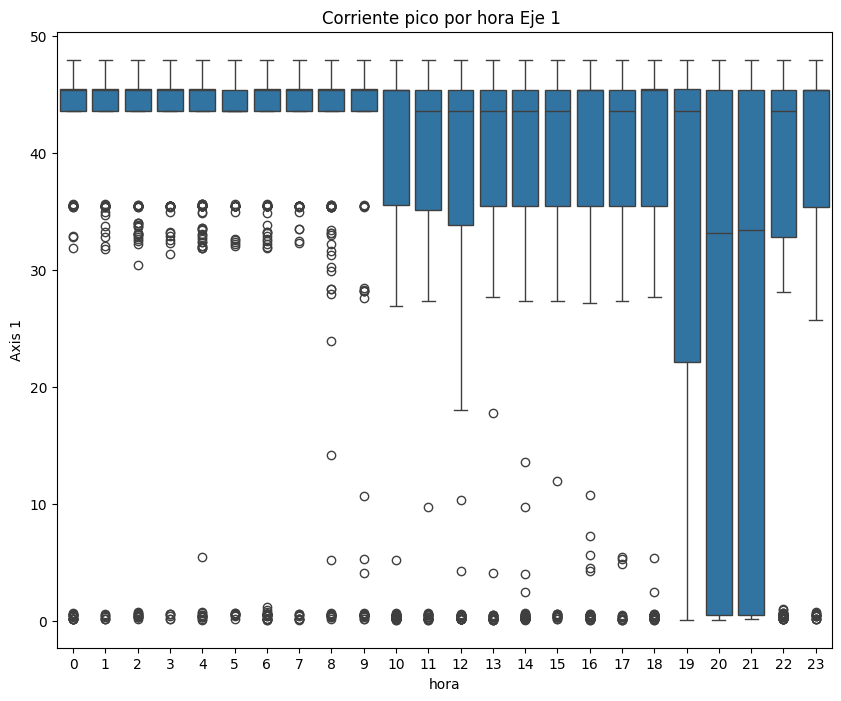

In [50]:
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=PeakCurrent,x='hora',y='Axis 1');
ax.set_title('Corriente pico por hora Eje 1 ');

In [51]:
len(PeakCurrent)

4719

In [52]:
len(Load_factor)

4799

In [53]:
len(RMotor_Current)

5712

In [54]:
PeakCurrent.head()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,hora,diadelasemana,cuarto,mes,año
Hora/Tiempo,,,,,,,,,,,,
2023-07-04 05:36:00,35.5,51.8,42.7,10.4,14.3,15.0,4.5,5,1,3,7,2023
2023-07-04 06:22:00,43.6,52.0,42.9,10.4,14.3,15.2,5.2,6,1,3,7,2023
2023-07-04 06:56:00,43.6,51.7,42.6,10.5,14.3,15.1,4.5,6,1,3,7,2023
2023-07-04 07:43:00,43.6,51.6,42.8,10.6,14.2,15.1,5.2,7,1,3,7,2023
2023-07-04 08:17:00,43.6,51.9,42.3,10.5,14.3,15.0,4.5,8,1,3,7,2023


In [55]:
Load_factor.head()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
Hora/Tiempo,,,,,,,,
2023-07-04 05:36:00,100.0,82.5,100.0,64.4,61.8,79.1,100.0,100.0
2023-07-04 06:22:00,100.0,82.0,100.0,59.2,61.4,80.4,100.0,100.0
2023-07-04 06:56:00,100.0,81.8,100.0,64.9,68.5,79.2,100.0,100.0
2023-07-04 07:43:00,100.0,82.5,100.0,65.1,68.5,79.2,100.0,88.8
2023-07-04 08:17:00,95.8,83.3,100.0,65.5,68.9,79.8,100.0,89.1


In [56]:
RMotor_Current.head()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8
Hora/Tiempo,,,,,,,,
2023-08-10 14:09:00,-1.21,-12.49,12.70,3.30,0.84,2.37,1.32,1.23
2023-08-10 14:57:00,18.45,-7.12,26.20,5.92,-5.54,5.76,-0.06,-5.58
2023-08-10 15:43:00,-0.84,-1.95,12.12,3.42,-5.51,1.29,-0.16,-0.57
2023-08-10 16:27:00,-5.85,28.78,17.19,4.18,-1.10,2.81,0.06,45.77
2023-08-10 16:55:00,7.33,-10.33,28.99,2.89,-3.53,7.46,-0.16,-0.49


### Juntamos las bases de datos de PeakCurrent y Load factor

In [57]:
Peak_Load=pd.merge_asof(PeakCurrent, Load_factor, left_index=True,right_index=True,tolerance=pd.Timedelta("60s"),allow_exact_matches=True)

In [58]:
Peak_Load.isna().sum()

Axis 1_x          0
Axis 2_x          0
Axis 3_x          0
Axis 4_x          0
Axis 5_x          0
Axis 6_x          0
Axis 7_x          0
hora              0
diadelasemana     0
cuarto            0
mes               0
año               0
Axis 1_y         33
Axis 2_y         33
Axis 3_y         33
Axis 4_y         33
Axis 5_y         33
Axis 6_y         33
Axis 7_y         33
Axis 8           33
dtype: int64

In [59]:
# Revisamos nombres de columnas generadas
Peak_Load.columns

Index(['Axis 1_x', 'Axis 2_x', 'Axis 3_x', 'Axis 4_x', 'Axis 5_x', 'Axis 6_x',
       'Axis 7_x', 'hora', 'diadelasemana', 'cuarto', 'mes', 'año', 'Axis 1_y',
       'Axis 2_y', 'Axis 3_y', 'Axis 4_y', 'Axis 5_y', 'Axis 6_y', 'Axis 7_y',
       'Axis 8'],
      dtype='object')

### Agregamos la base de datos RMotor Current a Peak Current y Load Factor

In [60]:
df=pd.merge_asof(Peak_Load, RMotor_Current, left_index=True,right_index=True,tolerance=pd.Timedelta("60s"),allow_exact_matches=True)

In [61]:
len(df)

4719

In [62]:
df

,Axis 1_x,Axis 2_x,Axis 3_x,Axis 4_x,Axis 5_x,Axis 6_x,Axis 7_x,hora,diadelasemana,cuarto,mes,año,Axis 1_y,Axis 2_y,Axis 3_y,Axis 4_y,Axis 5_y,Axis 6_y,Axis 7_y,Axis 8_x,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8_y
Hora/Tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-04 05:36:00,35.5,51.8,42.7,10.4,14.3,15.0,4.5,5,1,3,7,2023,100.0,82.5,100.0,64.4,61.8,79.1,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-04 06:22:00,43.6,52.0,42.9,10.4,14.3,15.2,5.2,6,1,3,7,2023,100.0,82.0,100.0,59.2,61.4,80.4,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-04 06:56:00,43.6,51.7,42.6,10.5,14.3,15.1,4.5,6,1,3,7,2023,100.0,81.8,100.0,64.9,68.5,79.2,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-04 07:43:00,43.6,51.6,42.8,10.6,14.2,15.1,5.2,7,1,3,7,2023,100.0,82.5,100.0,65.1,68.5,79.2,100.0,88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-04 08:17:00,43.6,51.9,42.3,10.5,14.3,15.0,4.5,8,1,3,7,2023,95.8,83.3,100.0,65.5,68.9,79.8,100.0,89.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-04 09:03:00,43.6,51.8,42.9,10.4,14.2,15.0,5.2,9,1,3,7,2023,100.0,82.7,100.0,65.3,68.9,79.4,100.0,88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-04 09:37:00,43.6,51.8,42.9,10.4,14.3,15.2,5.2,9,1,3,7,2023,100.0,82.5,100.0,65.2,69.1,79.0,100.0,91.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-04 10:16:00,43.6,51.7,42.9,10.7,14.3,15.0,4.5,10,1,3,7,2023,100.0,82.6,100.0,65.3,70.4,80.1,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-04 11:03:00,35.5,51.9,43.3,10.7,14.3,14.9,5.2,11,1,3,7,2023,100.0,82.2,100.0,65.6,69.0,79.8,100.0,92.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Eliminamos datos faltantes (En este caso son datos que no corresponden al rango de fechas de muestreo)

In [63]:
df.dropna(how='any',inplace=True)

In [64]:
len(df)

4230

In [65]:
df.head()

,Axis 1_x,Axis 2_x,Axis 3_x,Axis 4_x,Axis 5_x,Axis 6_x,Axis 7_x,hora,diadelasemana,cuarto,mes,año,Axis 1_y,Axis 2_y,Axis 3_y,Axis 4_y,Axis 5_y,Axis 6_y,Axis 7_y,Axis 8_x,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8_y
Hora/Tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-08-10 14:09:00,43.6,56.3,58.4,17.3,26.9,17.2,5.2,14,3,3,8,2023,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,-1.21,-12.49,12.70,3.30,0.84,2.37,1.32,1.23
2023-08-10 14:57:00,43.6,51.8,42.8,10.4,14.3,14.9,5.2,14,3,3,8,2023,100.0,81.7,100.0,63.5,61.3,79.6,100.0,100.0,18.45,-7.12,26.20,5.92,-5.54,5.76,-0.06,-5.58
2023-08-10 15:43:00,43.6,51.4,42.6,10.4,14.3,14.8,4.5,15,3,3,8,2023,100.0,81.7,100.0,66.1,69.0,79.7,100.0,100.0,-0.84,-1.95,12.12,3.42,-5.51,1.29,-0.16,-0.57
2023-08-10 16:27:00,43.6,51.6,42.4,10.4,14.1,15.1,4.5,16,3,3,8,2023,100.0,80.8,100.0,65.2,68.6,77.6,100.0,100.0,-5.85,28.78,17.19,4.18,-1.10,2.81,0.06,45.77
2023-08-10 16:56:00,35.5,51.4,43.1,10.6,14.1,14.8,4.5,16,3,3,8,2023,100.0,82.0,100.0,65.7,68.6,79.8,100.0,100.0,7.33,-10.33,28.99,2.89,-3.53,7.46,-0.16,-0.49


In [66]:
df.tail()

,Axis 1_x,Axis 2_x,Axis 3_x,Axis 4_x,Axis 5_x,Axis 6_x,Axis 7_x,hora,diadelasemana,cuarto,mes,año,Axis 1_y,Axis 2_y,Axis 3_y,Axis 4_y,Axis 5_y,Axis 6_y,Axis 7_y,Axis 8_x,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8_y
Hora/Tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-02-02 23:36:00,45.4,56.8,39.0,14.8,19.4,15.4,2.7,23,4,1,2,2024,100.0,68.1,100.0,61.5,77.2,66.1,100.0,100.0,-2.64,9.12,16.61,-3.04,-1.48,2.86,0.06,-0.16
2024-02-03 00:16:00,45.4,56.9,39.1,14.6,19.3,14.6,2.6,0,5,1,2,2024,100.0,67.9,100.0,58.8,76.9,67.0,100.0,100.0,10.65,9.28,14.23,5.77,1.18,1.29,-0.03,-1.07
2024-02-03 00:56:00,45.4,56.5,40.1,14.6,19.2,14.8,5.2,0,5,1,2,2024,100.0,67.9,100.0,61.4,76.8,67.0,100.0,100.0,-5.69,18.13,16.55,5.51,-0.46,7.15,0.03,50.04
2024-02-03 01:35:00,45.4,55.0,40.0,14.5,19.2,14.4,5.2,1,5,1,2,2024,100.0,67.9,100.0,60.9,76.7,66.9,100.0,100.0,13.18,-34.05,17.50,-5.77,-6.11,6.66,0.19,-0.98
2024-02-03 02:16:00,45.4,56.0,40.5,14.6,19.1,14.3,5.2,2,5,1,2,2024,100.0,67.8,100.0,58.8,76.7,67.4,100.0,100.0,17.55,-12.44,21.77,0.27,-6.83,-12.29,-2.73,-4.02


In [67]:
# Aseguramos que las variables de interes sean numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4230 entries, 2023-08-10 14:09:00 to 2024-02-03 02:16:00
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Axis 1_x       4230 non-null   float64
 1   Axis 2_x       4230 non-null   float64
 2   Axis 3_x       4230 non-null   float64
 3   Axis 4_x       4230 non-null   float64
 4   Axis 5_x       4230 non-null   float64
 5   Axis 6_x       4230 non-null   float64
 6   Axis 7_x       4230 non-null   float64
 7   hora           4230 non-null   int64  
 8   diadelasemana  4230 non-null   int64  
 9   cuarto         4230 non-null   int64  
 10  mes            4230 non-null   int64  
 11  año            4230 non-null   int64  
 12  Axis 1_y       4230 non-null   float64
 13  Axis 2_y       4230 non-null   float64
 14  Axis 3_y       4230 non-null   float64
 15  Axis 4_y       4230 non-null   float64
 16  Axis 5_y       4230 non-null   float64
 17  Axis 6_y       4

In [68]:
df.corr()

,Axis 1_x,Axis 2_x,Axis 3_x,Axis 4_x,Axis 5_x,Axis 6_x,Axis 7_x,hora,diadelasemana,cuarto,mes,año,Axis 1_y,Axis 2_y,Axis 3_y,Axis 4_y,Axis 5_y,Axis 6_y,Axis 7_y,Axis 8_x,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8_y
Axis 1_x,1.000000,0.922789,0.793760,0.853267,0.861705,0.893013,0.326328,-0.200008,-0.187302,0.032738,0.027076,-0.004284,0.908112,0.873913,0.898245,0.860829,0.820844,0.872729,0.859777,0.898610,-0.000310,0.088361,0.420268,0.065271,-0.093856,0.000919,0.081379,0.013283
Axis 2_x,0.922789,1.000000,0.854424,0.882504,0.887337,0.926438,0.356682,-0.190924,-0.181460,0.029243,0.021944,0.016138,0.914144,0.869869,0.910009,0.861256,0.841080,0.875571,0.856615,0.909366,-0.006971,0.086110,0.410082,0.068592,-0.087520,-0.008780,0.064952,0.011508
Axis 3_x,0.793760,0.854424,1.000000,0.885490,0.716579,0.817130,0.330305,-0.164185,-0.102028,0.371778,0.339080,-0.265569,0.799632,0.793323,0.796998,0.778197,0.822179,0.798819,0.707829,0.809088,-0.009882,0.066130,0.335660,0.060447,-0.084799,-0.015647,0.063403,0.003713
Axis 4_x,0.853267,0.882504,0.885490,1.000000,0.840903,0.872964,0.338269,-0.182220,-0.134532,0.051187,0.011631,0.089240,0.857076,0.777517,0.847684,0.798049,0.901942,0.790138,0.765631,0.874424,-0.002406,0.078454,0.367069,0.065825,-0.089304,-0.009975,0.088946,0.015557
Axis 5_x,0.861705,0.887337,0.716579,0.840903,1.000000,0.922033,0.424222,-0.143232,-0.121798,-0.125967,-0.137803,0.161133,0.897266,0.792832,0.884463,0.774041,0.768431,0.796383,0.706252,0.868596,0.000063,0.057517,0.342710,0.072447,-0.099357,0.010065,0.056873,0.012910
Axis 6_x,0.893013,0.926438,0.817130,0.872964,0.922033,1.000000,0.429922,-0.151278,-0.121962,0.032570,0.024902,-0.013950,0.932744,0.871620,0.931433,0.845192,0.818965,0.878893,0.772452,0.913270,-0.004290,0.072796,0.361758,0.068659,-0.096236,0.001394,0.057788,0.007303
Axis 7_x,0.326328,0.356682,0.330305,0.338269,0.424222,0.429922,1.000000,-0.031666,0.056828,0.015114,0.027831,-0.044000,0.395009,0.353704,0.392864,0.318519,0.296836,0.359410,0.202064,0.374135,-0.001810,-0.004226,0.096529,0.026235,-0.049650,0.008515,0.008428,-0.007847
hora,-0.200008,-0.190924,-0.164185,-0.182220,-0.143232,-0.151278,-0.031666,1.000000,-0.059128,-0.009071,-0.008959,0.000169,-0.183220,-0.172402,-0.170623,-0.189654,-0.191759,-0.191686,-0.204549,-0.204337,0.015298,0.003885,-0.153380,-0.026642,0.022145,0.007146,-0.019834,0.004529
diadelasemana,-0.187302,-0.181460,-0.102028,-0.134532,-0.121798,-0.121962,0.056828,-0.059128,1.000000,0.043349,0.060218,-0.079828,-0.128289,-0.165775,-0.133211,-0.148116,-0.113991,-0.136670,-0.263410,-0.129742,0.005154,-0.090713,-0.152005,0.009507,0.020394,-0.007089,-0.048114,0.011345
cuarto,0.032738,0.029243,0.371778,0.051187,-0.125967,0.032570,0.015114,-0.009071,0.043349,1.000000,0.975286,-0.918617,0.037989,0.174821,0.039963,0.120020,0.073522,0.160826,0.025331,0.063775,-0.007412,0.002993,0.002451,0.010077,-0.017060,-0.012970,0.016512,-0.031823


In [69]:
df.tail()

,Axis 1_x,Axis 2_x,Axis 3_x,Axis 4_x,Axis 5_x,Axis 6_x,Axis 7_x,hora,diadelasemana,cuarto,mes,año,Axis 1_y,Axis 2_y,Axis 3_y,Axis 4_y,Axis 5_y,Axis 6_y,Axis 7_y,Axis 8_x,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8_y
Hora/Tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-02-02 23:36:00,45.4,56.8,39.0,14.8,19.4,15.4,2.7,23,4,1,2,2024,100.0,68.1,100.0,61.5,77.2,66.1,100.0,100.0,-2.64,9.12,16.61,-3.04,-1.48,2.86,0.06,-0.16
2024-02-03 00:16:00,45.4,56.9,39.1,14.6,19.3,14.6,2.6,0,5,1,2,2024,100.0,67.9,100.0,58.8,76.9,67.0,100.0,100.0,10.65,9.28,14.23,5.77,1.18,1.29,-0.03,-1.07
2024-02-03 00:56:00,45.4,56.5,40.1,14.6,19.2,14.8,5.2,0,5,1,2,2024,100.0,67.9,100.0,61.4,76.8,67.0,100.0,100.0,-5.69,18.13,16.55,5.51,-0.46,7.15,0.03,50.04
2024-02-03 01:35:00,45.4,55.0,40.0,14.5,19.2,14.4,5.2,1,5,1,2,2024,100.0,67.9,100.0,60.9,76.7,66.9,100.0,100.0,13.18,-34.05,17.50,-5.77,-6.11,6.66,0.19,-0.98
2024-02-03 02:16:00,45.4,56.0,40.5,14.6,19.1,14.3,5.2,2,5,1,2,2024,100.0,67.8,100.0,58.8,76.7,67.4,100.0,100.0,17.55,-12.44,21.77,0.27,-6.83,-12.29,-2.73,-4.02


<Axes: xlabel='Hora/Tiempo'>

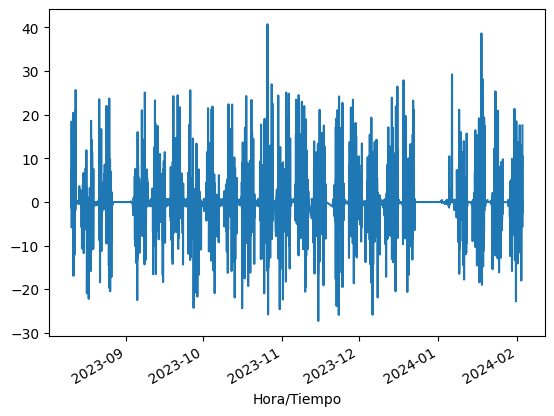

In [70]:
df['Axis 1'].plot()

<Axes: xlabel='Axis 2', ylabel='Axis 2_x'>

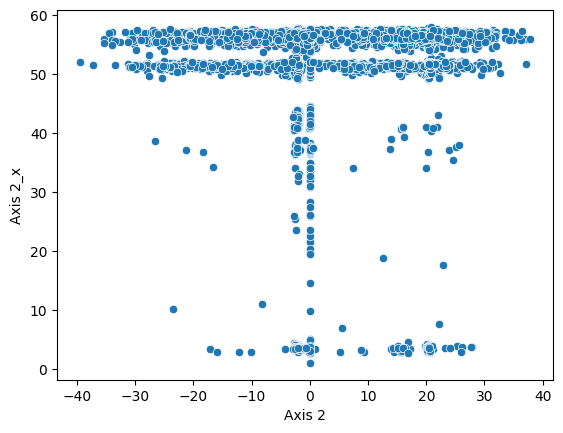

In [71]:
sns.scatterplot(data=df, x="Axis 2", y="Axis 2_x")

<Axes: xlabel='Axis 2', ylabel='Axis 2_y'>

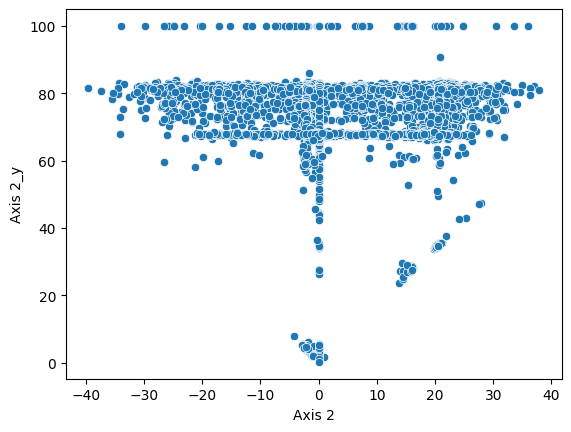

In [72]:
sns.scatterplot(data=df, x="Axis 2", y="Axis 2_y")

<Axes: xlabel='Axis 2_y', ylabel='Axis 2_x'>

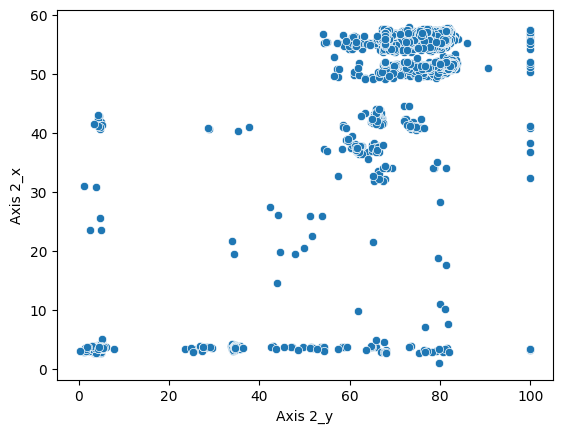

In [73]:
sns.scatterplot(data=df, x="Axis 2_y", y="Axis 2_x")

### Cargamos las bases de datos adicionales donde se registran detalles de las fallas de equipo

In [74]:
Ordered_Motor = pd.read_csv('./Ordered Motor Current.csv',skiprows=4,encoding='ISO-8859-1')
Cpu_Temp=pd.read_csv('./CPU Temperature.csv',skiprows=3,usecols=[0,1])
Breakdown=pd.read_csv('./Breakdown_from_2066500_History.csv')

In [75]:
Ordered_Motor.head()

,Hora/Tiempo,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
0,10/08/2023 13:52,-0.06,-2.93,9.23,-0.10,-0.30,-0.34,-0.13
1,10/08/2023 14:40,13.87,-1.14,11.73,3.10,1.19,-1.52,-0.06
2,10/08/2023 15:27,0.00,-3.12,9.37,-0.03,-0.31,-0.40,-0.12
3,10/08/2023 16:11,0.61,-12.95,9.07,-1.96,0.59,-0.70,5.17
4,10/08/2023 17:23,-12.96,-12.33,25.40,6.16,3.73,-0.79,-0.34


In [76]:
Cpu_Temp.head()

,Hora/Tiempo,Temperatura de CPU
0,10/08/2023 14:16,64.8
1,10/08/2023 15:04,65.2
2,10/08/2023 15:50,64.4
3,10/08/2023 16:34,64.7
4,10/08/2023 17:03,65.2


In [77]:
Breakdown.loc[Breakdown['Breakdown Time Minutes'] >10]

,Ocurred Date,Shift,Shop,Team,Line,Sub Line,Equipment,Equipment Name,Equipment Type,Sub Equipment Type,Part Category,P. Type.,P. Mfr.,BD Start Date,BD Start Time,BD End Date,BD End Time,DT Start Date,DT Start Time,DT End Date,DT End Time,Breakdown Time Minutes,Down Time,Cases,Delay Reason,Initial Status,Cause,Responsibility,Failure Category,BD Report,PT-ED or TC/UBS,TC/UBS 1 Line,Troubleshooting,Improvements,Unnamed: 34
0,2/6/2024,Night,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,GRIPPER,Electrical,Elec. Others,Other,2/6/2024,1:15:00,2/6/2024,1:30:00,2/6/2024,1:15:00,2/6/2024,1:15:00,15,0,1,Delayed Repair Work,DP & PLC Error,DP commuinication doesnt recover\r\n,Mt Welding,PARTS FAILURE,X,X,X,Make installation of Wireless Device,P: Feb-07 C: Feb-07 --> Install Wireless dev...,P: Feb-07 C: Feb-07 --> Recover normal opera...
2,11/30/2023,Day,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,GRIPPER,Electrical,Elec. Others,Siemens,11/30/2023,11:00:00,11/30/2023,11:23:00,11/30/2023,11:00:00,11/30/2023,11:00:00,23,0,2,NaN,DP error in the robot,DP Cable damaged,Mt Welding,PARTS FAILURE,X,X,X,Perform inspection the cables due alarm. we fo...,P: Nov-30 C: Nov-30 --> After production we ...,NaN
3,10/17/2023,Day,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,WELDER,Mechanical,Pipes/Hoses,Other,10/17/2023,8:00:00,10/17/2023,8:20:00,10/17/2023,8:00:00,10/17/2023,8:00:00,20,0,1,Lack of skills,Water leak,Connector damaged,Mt Welding,PARTS FAILURE,X,X,X,Water leak detected and reported by production...,P: Oct-17 C: Oct-17 --> Improve routing to p...,NaN
4,7/4/2023,Night,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,CABLE GRIPPER,Electrical,Elec. Others,Other,7/4/2023,0:35:00,7/4/2023,0:46:00,7/4/2023,0:35:00,7/4/2023,0:35:00,11,0,1,NaN,Servo amp 3 error and cp error,The cable connector PIO was dirty,Mt Welding,PARTS FAILURE,X,X,X,Was inspection the routing on the cables.\r\nW...,P: Jul-04 C: Jul-04 --> Pending inspection c...,NaN
5,6/22/2023,Day,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,GRIPPER,Electrical,Elec. Others,Other,6/22/2023,12:30:00,6/22/2023,12:45:00,6/22/2023,12:30:00,6/22/2023,12:30:00,15,0,2,NaN,Safety circuit error in the robot,Blinking relay safety system in the controller,Mt Welding,PARTS FAILURE,X,X,X,Check alarm found safety circuit error \r\nwe ...,P: Jun-23 C: Jun-23 --> After production ins...,NaN
6,6/20/2023,Day,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,ROBOT PARTS,Electrical,Elec. Others,Other,6/20/2023,15:22:00,6/20/2023,15:40:00,6/20/2023,15:22:00,6/20/2023,15:22:00,18,0,1,Delayed Repair Work,RB Error E1308 + E1508,Main Board Damage,Mt Welding,PARTS FAILURE,X,X,X,Make Teach Pendant Exchange\r\nMake sequence B...,P: Jun-20 C: Jun-20 --> Make deep inspection...,P: Jun-20 C: Jun-20 --> Return Original Teac...
7,6/12/2023,Day,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,ROBOT PARTS,Electrical,Servo,Other,6/12/2023,7:25:00,6/12/2023,7:37:00,6/12/2023,7:25:00,6/12/2023,7:25:00,12,0,2,NaN,ABS Encoder axis 6 in robot,Motor connector damaged in axis 6,Mt Welding,PARTS FAILURE,X,X,X,We check error found error in axis 6\r\nwe che...,P: Jun-14 C: Jun-14 --> \r\nAfter production...,NaN
8,6/5/2023,Day,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,WELDER,Electrical,Elec. Others,Other,6/5/2023,17:04:00,6/5/2023,17:19:00,6/5/2023,17:04:00,6/5/2023,17:04:00,15,0,1,Make Line Condition,ABS encoder error,The cable from the cableveyor was damaged axis 8,Mt Welding,PARTS FAILURE,X,X,X,Was replaced the encode.\r\nWas replaced cable...,P: Jun-05 C: Jun-05 --> PErform correctly ro...,NaN
9,5/31/2023,Day,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,WELDER,Mechanical,Pulley,Other,5/31/2023,13:23:00,5/31/2023,13:53:00,5/31/2023,14:02:00,5/31/2023,14:13:00,30,11,1,Make Line Condition

In [78]:
Breakdown.loc[Breakdown['Cause'].str.contains("motor")]

,Ocurred Date,Shift,Shop,Team,Line,Sub Line,Equipment,Equipment Name,Equipment Type,Sub Equipment Type,Part Category,P. Type.,P. Mfr.,BD Start Date,BD Start Time,BD End Date,BD End Time,DT Start Date,DT Start Time,DT End Date,DT End Time,Breakdown Time Minutes,Down Time,Cases,Delay Reason,Initial Status,Cause,Responsibility,Failure Category,BD Report,PT-ED or TC/UBS,TC/UBS 1 Line,Troubleshooting,Improvements,Unnamed: 34
14,12/8/2022,Night,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,GRIPPER,Electrical,Elec. Others,Other,12/8/2022,0:55:00,12/8/2022,1:01:00,12/8/2022,0:55:00,12/8/2022,0:55:00,6,0,4,NaN,Servo amp position error axis 3,Servo motor dyadic not move to position in tim...,Mt Welding,PARTS FAILURE,X,X,X,Check alarm and found servo amp position error...,P: Dec-08 C: Dec-08 --> After production we ...,NaN
30,1/31/2020,Day,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,NaN,Electrical,Elec. Others,Other,1/31/2020,14:20:00,1/31/2020,14:27:00,1/31/2020,14:20:00,1/31/2020,14:20:00,7,0,3,Can not find root cause,Line sops due servoamp NO3 error,Possible servomotor issue.,Mt Welding,COMMUNICATION / MES,X,X,X,Check HMI and it display servoamp 3 error.\r\n...,P: Jan-31 C: Jan-31 --> Replace power and en...,P: Jan-31 C: Jan-31 --> Replace servomotor C...


In [88]:
Breakdown.fillna("nc",inplace=True)

In [89]:
Breakdown['Improvements']=Breakdown['Improvements']+" "+Breakdown['Unnamed: 34']

In [90]:
Breakdown['Hora/Tiempo']=Breakdown['BD Start Date']+" "+Breakdown['BD Start Time']

In [91]:
Breakdown=Breakdown.set_index('Hora/Tiempo')
Breakdown.index = pd.to_datetime(Breakdown.index)

In [92]:
Breakdown.sort_index(inplace=True)

In [93]:
Breakdown.head()

,Ocurred Date,Shift,Shop,Team,Line,Sub Line,Equipment,Equipment Name,Equipment Type,Sub Equipment Type,Part Category,P. Type.,P. Mfr.,BD Start Date,BD Start Time,BD End Date,BD End Time,DT Start Date,DT Start Time,DT End Date,DT End Time,Breakdown Time Minutes,Down Time,Cases,Delay Reason,Initial Status,Cause,Responsibility,Failure Category,BD Report,PT-ED or TC/UBS,TC/UBS 1 Line,Troubleshooting,Improvements,Unnamed: 34
Hora/Tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-22 06:53:00,5/22/2019,Night,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,nc,Electrical,PLC CPU,Siemens,5/22/2019,6:53:00,5/22/2019,7:53:00,5/22/2019,6:53:00,5/22/2019,6:53:00,60,0,1,Can not find root cause,Not Match Sequence in robot due problem with i...,Internal problem with SD Memory Card in MCP1....,Mt Welding,CONTROL FAILURE,O,X,X,Check condition in the line verify the alarm i...,P: Jun-01 C: Jun-01 --> Change SD Memory Car...,P: Jun-01 C: Jun-01 --> Perform manual for c...
2019-07-02 03:28:00,7/2/2019,Night,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,nc,Electrical,Encoder,Other,7/2/2019,3:28:00,7/2/2019,4:05:00,7/2/2019,3:28:00,7/2/2019,3:28:00,37,0,1,Lack of skills,Line stop due Robot encoder Error at JT#8,Possible initial damage on encoder cable for C...,Mt Welding,PARTS FAILURE,X,X,X,Check Robot HMI indicate Error E1032 Encoder D...,P: Jul-03 C: Jul-04 --> Verify Axis #8 Encod...,nc
2019-07-02 07:14:00,7/2/2019,Day,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,nc,Electrical,Encoder,Other,7/2/2019,7:14:00,7/2/2019,7:28:00,7/2/2019,7:14:00,7/2/2019,7:14:00,14,0,1,nc,Line stop due Robot encoder Error at JT#8,Possible initial damage on encoder cable ...,Mt Welding,PARTS FAILURE,X,X,X,Check Robot HMI indicate Error \r\nE1032 Encod...,P: Jul-03 C: Jul-03 --> Verify Axis #8 Encod...,nc
2019-08-07 10:00:00,8/7/2019,Day,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,nc,Electrical,Elec. Others,Other,8/7/2019,10:00:00,8/7/2019,10:40:00,8/7/2019,10:45:00,8/7/2019,10:48:00,40,3,1,Make Line Condition,Line stop due Encoder follow up Error at JT8,Encoder cable damaged on Robot carriage due b...,Mt Welding,INSPECTION FAILURE,X,X,X,Check Conditions on site found robot 4...,P: Aug-08 C: Aug-08 --> Verify Robot length ...,nc
2019-09-20 12:45:00,9/20/2019,Day,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,nc,Electrical,Elec. Others,Other,9/20/2019,12:45:00,9/20/2019,13:00:00,9/20/2019,13:15:00,9/20/2019,13:37:00,15,22,1,nc,Robot stops suddenly due to damaged power cabl...,Mechanical worn out.\r\n,Mt Welding,PARTS FAILURE,X,X,X,Check the robot controller.\r\nReview alarm of...,P: Sep-20 C: Sep-20 --> Replace the damaged ...,nc


In [95]:
Breakdown.tail()

,Ocurred Date,Shift,Shop,Team,Line,Sub Line,Equipment,Equipment Name,Equipment Type,Sub Equipment Type,Part Category,P. Type.,P. Mfr.,BD Start Date,BD Start Time,BD End Date,BD End Time,DT Start Date,DT Start Time,DT End Date,DT End Time,Breakdown Time Minutes,Down Time,Cases,Delay Reason,Initial Status,Cause,Responsibility,Failure Category,BD Report,PT-ED or TC/UBS,TC/UBS 1 Line,Troubleshooting,Improvements,Unnamed: 34
Hora/Tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-04 00:35:00,7/4/2023,Night,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,CABLE GRIPPER,Electrical,Elec. Others,Other,7/4/2023,0:35:00,7/4/2023,0:46:00,7/4/2023,0:35:00,7/4/2023,0:35:00,11,0,1,nc,Servo amp 3 error and cp error,The cable connector PIO was dirty,Mt Welding,PARTS FAILURE,X,X,X,Was inspection the routing on the cables.\r\nW...,P: Jul-04 C: Jul-04 --> Pending inspection c...,nc
2023-10-17 08:00:00,10/17/2023,Day,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,WELDER,Mechanical,Pipes/Hoses,Other,10/17/2023,8:00:00,10/17/2023,8:20:00,10/17/2023,8:00:00,10/17/2023,8:00:00,20,0,1,Lack of skills,Water leak,Connector damaged,Mt Welding,PARTS FAILURE,X,X,X,Water leak detected and reported by production...,P: Oct-17 C: Oct-17 --> Improve routing to p...,nc
2023-11-30 11:00:00,11/30/2023,Day,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,GRIPPER,Electrical,Elec. Others,Siemens,11/30/2023,11:00:00,11/30/2023,11:23:00,11/30/2023,11:00:00,11/30/2023,11:00:00,23,0,2,nc,DP error in the robot,DP Cable damaged,Mt Welding,PARTS FAILURE,X,X,X,Perform inspection the cables due alarm. we fo...,P: Nov-30 C: Nov-30 --> After production we ...,nc
2024-02-06 01:15:00,2/6/2024,Night,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,GRIPPER,Electrical,Elec. Others,Other,2/6/2024,1:15:00,2/6/2024,1:30:00,2/6/2024,1:15:00,2/6/2024,1:15:00,15,0,1,Delayed Repair Work,DP & PLC Error,DP commuinication doesnt recover\r\n,Mt Welding,PARTS FAILURE,X,X,X,Make installation of Wireless Device,P: Feb-07 C: Feb-07 --> Install Wireless dev...,P: Feb-07 C: Feb-07 --> Recover normal opera...
2024-02-06 17:02:00,2/6/2024,Day,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,CABLE GRIPPER,Electrical,PLC Comm. Module,Siemens,2/6/2024,17:02:00,2/6/2024,17:10:00,2/6/2024,17:02:00,2/6/2024,17:02:00,8,0,1,Make Line Condition,"Error of gripper, servo amp 1,2,3, DP,etc",The profibus cable was damaged from the axis 3...,Mt Welding,PARTS FAILURE,X,X,X,-Was inspection the cables from the axis 1 to ...,P: Feb-06 C: Feb-06 --> After production we ...,nc


In [96]:
df1=pd.merge_asof(Breakdown,df, left_index=True,right_index=True,tolerance=pd.Timedelta(days=1),allow_exact_matches=True)

In [97]:
df1.tail()

,Ocurred Date,Shift,Shop,Team,Line,Sub Line,Equipment,Equipment Name,Equipment Type,Sub Equipment Type,Part Category,P. Type.,P. Mfr.,BD Start Date,BD Start Time,BD End Date,BD End Time,DT Start Date,DT Start Time,DT End Date,DT End Time,Breakdown Time Minutes,Down Time,Cases,Delay Reason,Initial Status,Cause,Responsibility,Failure Category,BD Report,PT-ED or TC/UBS,TC/UBS 1 Line,Troubleshooting,Improvements,Unnamed: 34,Axis 1_x,Axis 2_x,Axis 3_x,Axis 4_x,Axis 5_x,Axis 6_x,Axis 7_x,hora,diadelasemana,cuarto,mes,año,Axis 1_y,Axis 2_y,Axis 3_y,Axis 4_y,Axis 5_y,Axis 6_y,Axis 7_y,Axis 8_x,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8_y
Hora/Tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-04 00:35:00,7/4/2023,Night,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,CABLE GRIPPER,Electrical,Elec. Others,Other,7/4/2023,0:35:00,7/4/2023,0:46:00,7/4/2023,0:35:00,7/4/2023,0:35:00,11,0,1,nc,Servo amp 3 error and cp error,The cable connector PIO was dirty,Mt Welding,PARTS FAILURE,X,X,X,Was inspection the routing on the cables.\r\nW...,P: Jul-04 C: Jul-04 --> Pending inspection c...,nc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 08:00:00,10/17/2023,Day,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,WELDER,Mechanical,Pipes/Hoses,Other,10/17/2023,8:00:00,10/17/2023,8:20:00,10/17/2023,8:00:00,10/17/2023,8:00:00,20,0,1,Lack of skills,Water leak,Connector damaged,Mt Welding,PARTS FAILURE,X,X,X,Water leak detected and reported by production...,P: Oct-17 C: Oct-17 --> Improve routing to p...,nc,45.5,50.6,53.3,14.7,14.4,14.9,2.4,7.0,1.0,4.0,10.0,2023.0,100.0,73.8,100.0,65.0,76.8,69.6,100.0,100.0,-2.53,20.4,16.08,5.73,-1.67,4.21,0.0,5.25
2023-11-30 11:00:00,11/30/2023,Day,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,GRIPPER,Electrical,Elec. Others,Siemens,11/30/2023,11:00:00,11/30/2023,11:23:00,11/30/2023,11:00:00,11/30/2023,11:00:00,23,0,2,nc,DP error in the robot,DP Cable damaged,Mt Welding,PARTS FAILURE,X,X,X,Perform inspection the cables due alarm. we fo...,P: Nov-30 C: Nov-30 --> After production we ...,nc,43.6,55.8,40.0,10.3,14.3,15.0,5.2,10.0,3.0,4.0,11.0,2023.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00
2024-02-06 01:15:00,2/6/2024,Night,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,GRIPPER,Electrical,Elec. Others,Other,2/6/2024,1:15:00,2/6/2024,1:30:00,2/6/2024,1:15:00,2/6/2024,1:15:00,15,0,1,Delayed Repair Work,DP & PLC Error,DP commuinication doesnt recover\r\n,Mt Welding,PARTS FAILURE,X,X,X,Make installation of Wireless Device,P: Feb-07 C: Feb-07 --> Install Wireless dev...,P: Feb-07 C: Feb-07 --> Recover normal opera...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-06 17:02:00,2/6/2024,Day,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,CABLE GRIPPER,Electrical,PLC Comm. Module,Siemens,2/6/2024,17:02:00,2/6/2024,17:10:00,2/6/2024,17:02:00,2/6/2024,17:02:00,8,0,1,Make Line Condition,"Error of gripper, servo amp 1,2,3, DP,etc",The profibus cable was damaged from the axis 3...,Mt Welding,PARTS FAILURE,X,X,X,-Was inspection the cables from the axis 1 to ...,P: Feb-06 C: Feb-06 --> After production we ...,nc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df1.dropna(how='any',inplace=True)

In [99]:
df1.head()

,Ocurred Date,Shift,Shop,Team,Line,Sub Line,Equipment,Equipment Name,Equipment Type,Sub Equipment Type,Part Category,P. Type.,P. Mfr.,BD Start Date,BD Start Time,BD End Date,BD End Time,DT Start Date,DT Start Time,DT End Date,DT End Time,Breakdown Time Minutes,Down Time,Cases,Delay Reason,Initial Status,Cause,Responsibility,Failure Category,BD Report,PT-ED or TC/UBS,TC/UBS 1 Line,Troubleshooting,Improvements,Unnamed: 34,Axis 1_x,Axis 2_x,Axis 3_x,Axis 4_x,Axis 5_x,Axis 6_x,Axis 7_x,hora,diadelasemana,cuarto,mes,año,Axis 1_y,Axis 2_y,Axis 3_y,Axis 4_y,Axis 5_y,Axis 6_y,Axis 7_y,Axis 8_x,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 8_y
Hora/Tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-10-17 08:00:00,10/17/2023,Day,Welding,B,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,WELDER,Mechanical,Pipes/Hoses,Other,10/17/2023,8:00:00,10/17/2023,8:20:00,10/17/2023,8:00:00,10/17/2023,8:00:00,20,0,1,Lack of skills,Water leak,Connector damaged,Mt Welding,PARTS FAILURE,X,X,X,Water leak detected and reported by production...,P: Oct-17 C: Oct-17 --> Improve routing to p...,nc,45.5,50.6,53.3,14.7,14.4,14.9,2.4,7.0,1.0,4.0,10.0,2023.0,100.0,73.8,100.0,65.0,76.8,69.6,100.0,100.0,-2.53,20.4,16.08,5.73,-1.67,4.21,0.0,5.25
2023-11-30 11:00:00,11/30/2023,Day,Welding,A,T/LID,MCP1,2066500,461-2 Robot_Grip(M)/SV Gun/Inv TC/Carri,ROBOT,GRIPPER,Electrical,Elec. Others,Siemens,11/30/2023,11:00:00,11/30/2023,11:23:00,11/30/2023,11:00:00,11/30/2023,11:00:00,23,0,2,nc,DP error in the robot,DP Cable damaged,Mt Welding,PARTS FAILURE,X,X,X,Perform inspection the cables due alarm. we fo...,P: Nov-30 C: Nov-30 --> After production we ...,nc,43.6,55.8,40.0,10.3,14.3,15.0,5.2,10.0,3.0,4.0,11.0,2023.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00


### Por el momento solo tenemos 2 coincidencias en los datos. Hay que conseguir mas informacion

### Codigo adicional por si queremos extraer mas datos de las columnas

In [79]:
dfpc = pd.read_csv('./PeakCurrent.csv')
dfpc=dfpc.set_index('Hora/Tiempo')
dfpc.index = pd.to_datetime(dfpc.index,dayfirst=True)
dfpc.sort_index(inplace=True)

In [80]:
dfpc.head(10)

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7
Hora/Tiempo,,,,,,,
2023-07-04 05:36:00,"35.5 (pg41, 40)","51.8 (pg71, 27)","42.7 (pg90, 8)","10.4 (pg41, 45)","14.3 (pg71, 37)","15 (pg41, 21)","4.5 (pg31, 24)"
2023-07-04 06:22:00,"43.6 (pg41, 36)","52 (pg71, 27)","42.9 (pg90, 8)","10.4 (pg41, 45)","14.3 (pg71, 37)","15.2 (pg41, 21)","5.2 (pg71, 10)"
2023-07-04 06:56:00,"43.6 (pg41, 36)","51.7 (pg71, 27)","42.6 (pg90, 8)","10.5 (pg41, 45)","14.3 (pg71, 37)","15.1 (pg41, 21)","4.5 (pg41, 9)"
2023-07-04 07:43:00,"43.6 (pg41, 36)","51.6 (pg71, 27)","42.8 (pg90, 8)","10.6 (pg41, 45)","14.2 (pg71, 37)","15.1 (pg41, 21)","5.2 (pg71, 10)"
2023-07-04 08:17:00,"43.6 (pg41, 36)","51.9 (pg71, 27)","42.3 (pg90, 8)","10.5 (pg41, 45)","14.3 (pg71, 37)","15 (pg41, 21)","4.5 (pg41, 9)"
2023-07-04 09:03:00,"43.6 (pg41, 36)","51.8 (pg71, 27)","42.9 (pg90, 8)","10.4 (pg41, 45)","14.2 (pg71, 37)","15 (pg41, 21)","5.2 (pg71, 10)"
2023-07-04 09:37:00,"43.6 (pg41, 36)","51.8 (pg71, 27)","42.9 (pg90, 8)","10.4 (pg41, 45)","14.3 (pg71, 37)","15.2 (pg41, 21)","5.2 (pg71, 10)"
2023-07-04 10:16:00,"43.6 (pg41, 36)","51.7 (pg71, 27)","42.9 (pg90, 8)","10.7 (pg41, 45)","14.3 (pg71, 37)","15 (pg41, 21)","4.5 (pg41, 9)"
2023-07-04 11:03:00,"35.5 (pg41, 40)","51.9 (pg71, 27)","43.3 (pg90, 8)","10.7 (pg41, 45)","14.3 (pg71, 37)","14.9 (pg41, 21)","5.2 (pg71, 33)"


In [81]:
import re

In [82]:
def separar_string_0(s):
    s=re.sub(r"[^\.^\w]", " ", s).split()
    return float(s[0])

def separar_string_1(s):
    s=re.sub(r"[^\.^\w]", " ", s).split()
    print(s)
    return s[1]

def separar_string(s):
    s=tuple(re.sub(r"[^\.^\w]", " ", s).split())
    return (s[0], s[1],s[2])


In [83]:
dfpc=dfpc.loc[(dfpc!='0').any(axis=1)]
for column in dfpc.columns:
    dfpc[f'{column}_current_'],dfpc[f'{column}_program_'],dfpc[f'{column}_other']=zip(*dfpc[column].map(separar_string))




<ipython-input-83-29b040f3d674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpc[f'{column}_current_'],dfpc[f'{column}_program_'],dfpc[f'{column}_other']=zip(*dfpc[column].map(separar_string))
<ipython-input-83-29b040f3d674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpc[f'{column}_current_'],dfpc[f'{column}_program_'],dfpc[f'{column}_other']=zip(*dfpc[column].map(separar_string))
<ipython-input-83-29b040f3d674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [84]:
dfpc.head()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 1_current_,Axis 1_program_,Axis 1_other,Axis 2_current_,Axis 2_program_,Axis 2_other,Axis 3_current_,Axis 3_program_,Axis 3_other,Axis 4_current_,Axis 4_program_,Axis 4_other,Axis 5_current_,Axis 5_program_,Axis 5_other,Axis 6_current_,Axis 6_program_,Axis 6_other,Axis 7_current_,Axis 7_program_,Axis 7_other
Hora/Tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-04 05:36:00,"35.5 (pg41, 40)","51.8 (pg71, 27)","42.7 (pg90, 8)","10.4 (pg41, 45)","14.3 (pg71, 37)","15 (pg41, 21)","4.5 (pg31, 24)",35.5,pg41,40,51.8,pg71,27,42.7,pg90,8,10.4,pg41,45,14.3,pg71,37,15,pg41,21,4.5,pg31,24
2023-07-04 06:22:00,"43.6 (pg41, 36)","52 (pg71, 27)","42.9 (pg90, 8)","10.4 (pg41, 45)","14.3 (pg71, 37)","15.2 (pg41, 21)","5.2 (pg71, 10)",43.6,pg41,36,52,pg71,27,42.9,pg90,8,10.4,pg41,45,14.3,pg71,37,15.2,pg41,21,5.2,pg71,10
2023-07-04 06:56:00,"43.6 (pg41, 36)","51.7 (pg71, 27)","42.6 (pg90, 8)","10.5 (pg41, 45)","14.3 (pg71, 37)","15.1 (pg41, 21)","4.5 (pg41, 9)",43.6,pg41,36,51.7,pg71,27,42.6,pg90,8,10.5,pg41,45,14.3,pg71,37,15.1,pg41,21,4.5,pg41,9
2023-07-04 07:43:00,"43.6 (pg41, 36)","51.6 (pg71, 27)","42.8 (pg90, 8)","10.6 (pg41, 45)","14.2 (pg71, 37)","15.1 (pg41, 21)","5.2 (pg71, 10)",43.6,pg41,36,51.6,pg71,27,42.8,pg90,8,10.6,pg41,45,14.2,pg71,37,15.1,pg41,21,5.2,pg71,10
2023-07-04 08:17:00,"43.6 (pg41, 36)","51.9 (pg71, 27)","42.3 (pg90, 8)","10.5 (pg41, 45)","14.3 (pg71, 37)","15 (pg41, 21)","4.5 (pg41, 9)",43.6,pg41,36,51.9,pg71,27,42.3,pg90,8,10.5,pg41,45,14.3,pg71,37,15,pg41,21,4.5,pg41,9


In [85]:
dfpc.loc[:,'Axis 1_other'][1]

'36'

In [87]:
dfpc.tail()

,Axis 1,Axis 2,Axis 3,Axis 4,Axis 5,Axis 6,Axis 7,Axis 1_current_,Axis 1_program_,Axis 1_other,Axis 2_current_,Axis 2_program_,Axis 2_other,Axis 3_current_,Axis 3_program_,Axis 3_other,Axis 4_current_,Axis 4_program_,Axis 4_other,Axis 5_current_,Axis 5_program_,Axis 5_other,Axis 6_current_,Axis 6_program_,Axis 6_other,Axis 7_current_,Axis 7_program_,Axis 7_other
Hora/Tiempo,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-02-02 23:36:00,"45.4 (pg90, 26)","56.8 (pg71, 27)","39 (pg90, 8)","14.8 (pg51, 18)","19.4 (pg61, 46)","15.4 (pg71, 21)","2.7 (pg90, 9)",45.4,pg90,26,56.8,pg71,27,39,pg90,8,14.8,pg51,18,19.4,pg61,46,15.4,pg71,21,2.7,pg90,9
2024-02-03 00:16:00,"45.4 (pg90, 26)","56.9 (pg71, 27)","39.1 (pg90, 8)","14.6 (pg51, 18)","19.3 (pg61, 46)","14.6 (pg71, 21)","2.6 (pg90, 9)",45.4,pg90,26,56.9,pg71,27,39.1,pg90,8,14.6,pg51,18,19.3,pg61,46,14.6,pg71,21,2.6,pg90,9
2024-02-03 00:56:00,"45.4 (pg90, 26)","56.5 (pg71, 27)","40.1 (pg90, 8)","14.6 (pg51, 18)","19.2 (pg61, 46)","14.8 (pg71, 21)","5.2 (pg71, 10)",45.4,pg90,26,56.5,pg71,27,40.1,pg90,8,14.6,pg51,18,19.2,pg61,46,14.8,pg71,21,5.2,pg71,10
2024-02-03 01:35:00,"45.4 (pg90, 26)","55 (pg71, 27)","40 (pg90, 8)","14.5 (pg51, 18)","19.2 (pg61, 46)","14.4 (pg71, 21)","5.2 (pg71, 10)",45.4,pg90,26,55,pg71,27,40,pg90,8,14.5,pg51,18,19.2,pg61,46,14.4,pg71,21,5.2,pg71,10
2024-02-03 02:16:00,"45.4 (pg90, 26)","56 (pg71, 27)","40.5 (pg90, 8)","14.6 (pg51, 18)","19.1 (pg61, 46)","14.3 (pg71, 21)","5.2 (pg71, 27)",45.4,pg90,26,56,pg71,27,40.5,pg90,8,14.6,pg51,18,19.1,pg61,46,14.3,pg71,21,5.2,pg71,27
